# Описание данных

Данные - специально подготовленная выборка из полного набора, описанного здесь: https://mengtingwan.github.io/data/goodreads#datasets с дополнениями из https://www.kaggle.com/datasets/austinreese/goodreads-books:
- books: перечень книг (~44 тыс.) из списка https://www.goodreads.com/list/show/1.Best_Books_Ever (совпадение по book id),
- interactions: взаимодействие пользователей с книгами

Основной массив данных был собран в конце 2017.

# Инициализация

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

Создаём логгер, который удобен для использования в ноутбуке.

# Load Data

Загружаем данные как они есть, начинаем на них смотреть: какие в них есть сущности, атрибуты, распределения.

In [4]:
books = pd.read_parquet("/home/mle-user/mle_projects/mle-recsys-start/books.parquet")

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 3 to 2360448
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               43312 non-null  int64  
 1   author                43312 non-null  object 
 2   title                 43312 non-null  object 
 3   description           43312 non-null  object 
 4   genre_and_votes       43312 non-null  object 
 5   num_pages             37001 non-null  Int64  
 6   average_rating        43312 non-null  float64
 7   ratings_count         43312 non-null  Int64  
 8   text_reviews_count    43312 non-null  int64  
 9   publisher             43312 non-null  object 
 10  publication_year      35891 non-null  Int64  
 11  country_code          43312 non-null  object 
 12  language_code         43312 non-null  object 
 13  format                43312 non-null  object 
 14  is_ebook              43312 non-null  bool   
 15  isbn                  

Пример данных по книгам

In [5]:
print(books[["book_id", "author", "title", "num_pages", "average_rating"]].sample(5, random_state=52).sort_values("book_id").set_index("book_id").to_string())

                                             author                                            title  num_pages  average_rating
book_id                                                                                                                        
69882                 Heinrich Böll, Patrick Bowles                      Billiards at Half-Past Nine        288            3.93
267533                               Robert Cormier                                         8 Plus 1        173            3.67
820966    Martin Luther, J.I. Packer, O.R. Johnston                          The Bondage of the Will        322            4.17
4532622                               Karen Hancock                                      The Enclave        492            3.82
20444381                             Diana Gabaldon  Os tambores de outono - 1ª Parte (Outlander #4)       1048            3.99


In [79]:
interactions = pd.read_parquet("/home/mle-user/mle_projects/mle-recsys-start/interactions.parquet")

Можно оценить объём данных о взаимодействиях

In [7]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12890434 entries, 0 to 12914458
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   book_id      int64 
 2   started_at   object
 3   read_at      object
 4   is_read      bool  
 5   rating       int64 
 6   is_reviewed  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 614.7+ MB


Пример данных по взаимодействиям

In [8]:
print(interactions[["user_id", "book_id", "started_at", "read_at", "is_read", "rating"]].sample(5, random_state=52).sort_values("user_id").set_index(["user_id", "book_id"]).to_string())

                                           started_at     read_at  is_read  rating
user_id                          book_id                                          
0447747f44c0d8d1a08cf329fe253f29 10054335  2016-04-08  2016-04-20     True       3
14432756ffba6357686f09e4ccc332bb 26252859  2016-05-27  2016-05-30     True       5
46d6c8cf548d1c86abb671f42ba71b5e 960       2014-08-06  2016-10-29     True       5
71c2b3714945af1f700f49953904c510 18492859  2014-10-09  2014-10-12     True       5
7802bafdeac8abff23a72b9dd60b1dd1 18710190  2015-03-01  2015-05-05     True       4


# EDA

Посмотрим на данные о книгах, какие поля есть.

Задание. Проведите EDA представленного датасета. Оцените:
- количество пользователей,
- среднее количество прочитанных книг на пользователя,
- долю прочитанных книг, у которых нет рейтинга,
- распределение рейтинга,
- распределение популярности (долю пользователей, приходящуюся на одну книгу),
- распределение количества взаимодействий во времени,
- есть ли какие-то логические нестыковки и странности в данных.

In [9]:
books.sample(3).T

,1717455,1873681,172667
book_id,18485973,10109832,9955669
author,Rachel Van Dyken,Mercedes Keyes,Rick Yancey
title,"The Wager (The Bet, #2)",The Fancy (The Fancy Series #1),"The Isle of Blood (The Monstrumologist, #3)"
description,"THE WAGER\nLose a bet, lose your heart...\nWha...","The slave trader, ""fancy"" dealer was saving th...","When Dr. Warthrop goes hunting the ""Holy Grail..."
genre_and_votes,"{'Romance': 181, 'New Adult': 82, 'Contemporar...","{'Romance-Historical Romance': 14, 'Romance-In...","{'Horror': 318, 'Young Adult': 211, 'Fantasy':..."
num_pages,256,260,538
average_rating,4.15,4.19,4.25
ratings_count,4390,320,3399
text_reviews_count,272,28,397
publisher,Forever,Lulu,Simon Schuster Books for Young Readers


Посмотрим на данные о взаимодействиях пользователей с книгами.

In [11]:
interactions.sample(3).T

,6143362,7796255,9219978
user_id,f105b2d342645de87dc7a6da306b87fa,7caf4b07c74031840336a3902e74b17f,92eabab89e7bbaf04951e44d3beb2d6b
book_id,1656001,12989100,5367
started_at,2015-01-13,2015-09-28,2012-12-13
read_at,2015-01-16,2015-09-29,2012-12-17
is_read,True,True,True
rating,5,4,4
is_reviewed,False,False,False


In [39]:
# количество пользователей
users_cnt = interactions['user_id'].nunique()
# количество прочитанных книг
read_books_cnt = interactions[interactions['is_read'] == True]['book_id'].count()
# количество прочитанных книг без рейтинга
read_books_no_rating_cnt = interactions.query(
    "is_read == True and rating == 0"
)['book_id'].count()

In [40]:
print('Количество пользователей сервиса -', users_cnt)
print('Среднее количество прочитанных книг на пользователя -', read_books_cnt/users_cnt)
print('Доля прочитанных книг без рейтинга -', read_books_no_rating_cnt/read_books_cnt)


Количество пользователей сервиса - 542657
Среднее количество прочитанных книг на пользователя - 23.7542941489744
Доля прочитанных книг без рейтинга - 0.08158546097051503


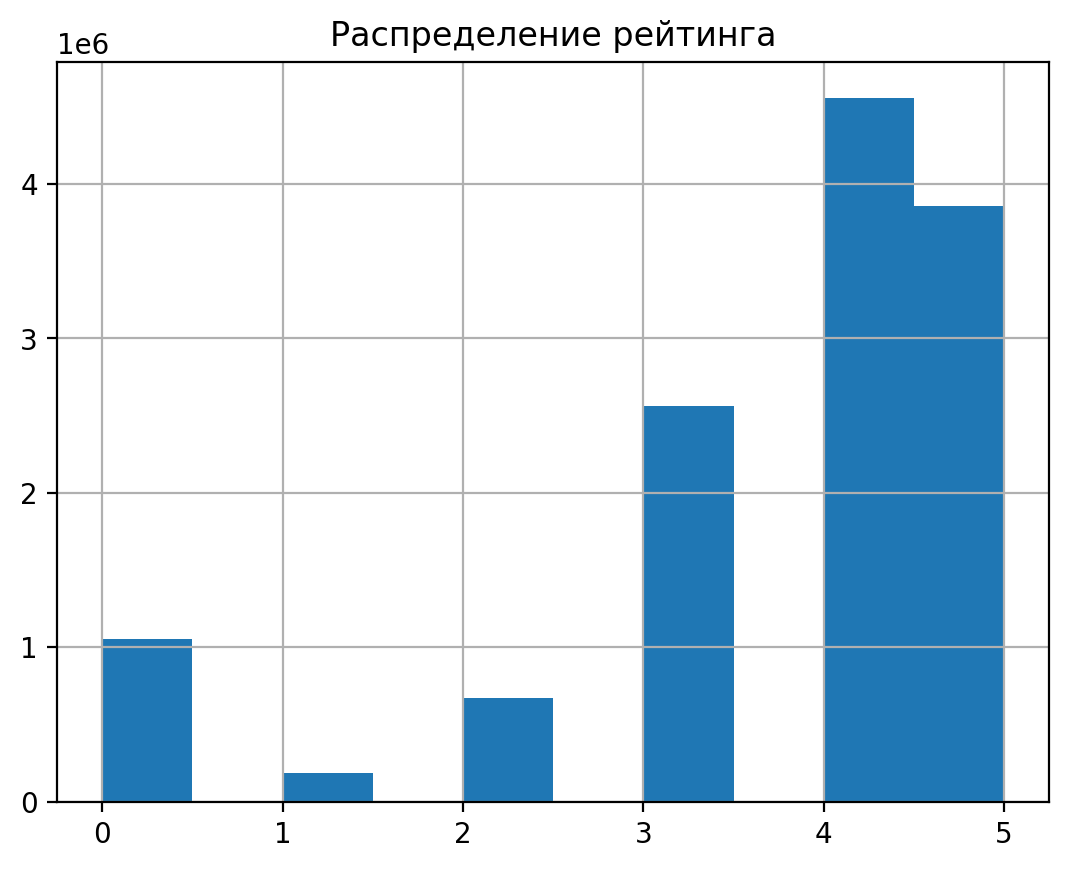

In [21]:
# распределение рейтинга
interactions['rating'].hist()
plt.title('Распределение рейтинга')
plt.show()

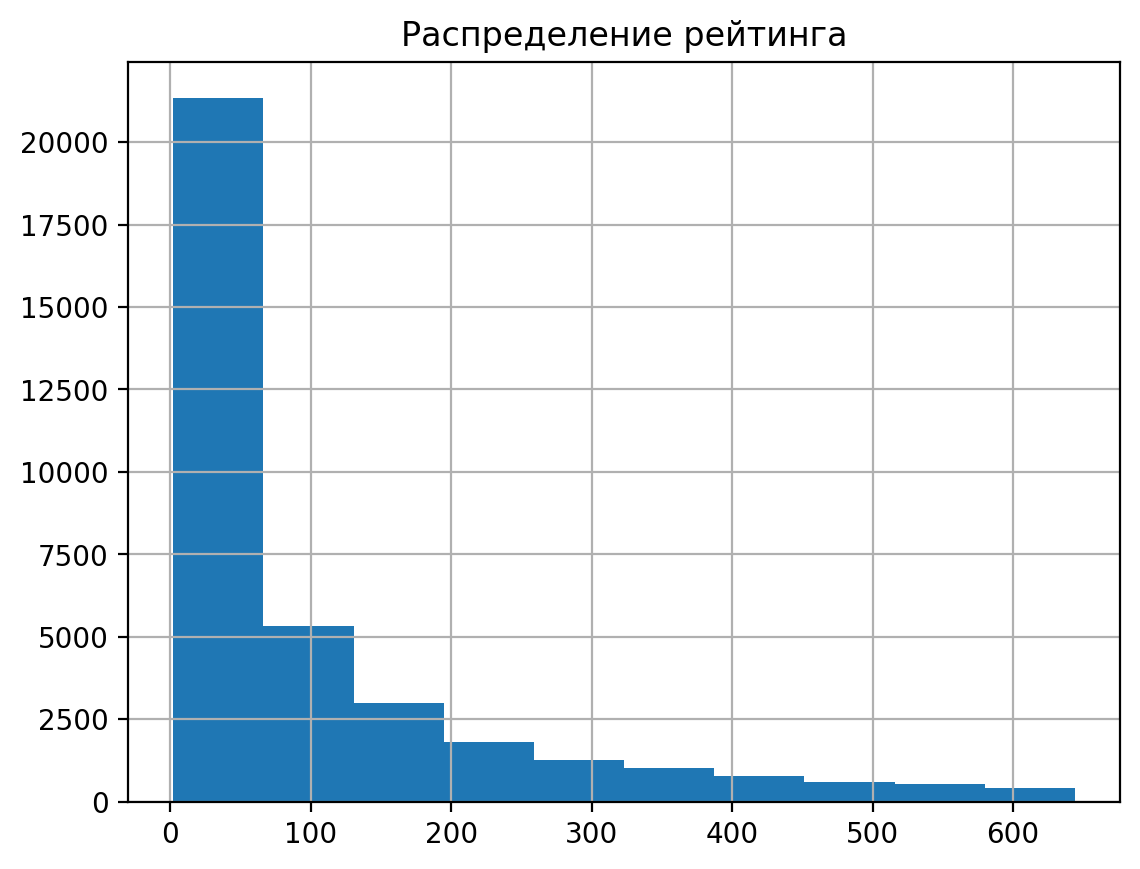

In [29]:
# распределение рейтинга
user_by_book = interactions[interactions['is_read'] == True].groupby('book_id').agg({'user_id':'nunique'})
perc_99 = np.percentile(user_by_book['user_id'], 90)
perc_1 = np.percentile(user_by_book['user_id'], 1)
user_by_book_clean = user_by_book.query('user_id > @perc_1 and user_id < @perc_99')
user_by_book_clean.hist()
plt.title('Распределение рейтинга')
plt.show()

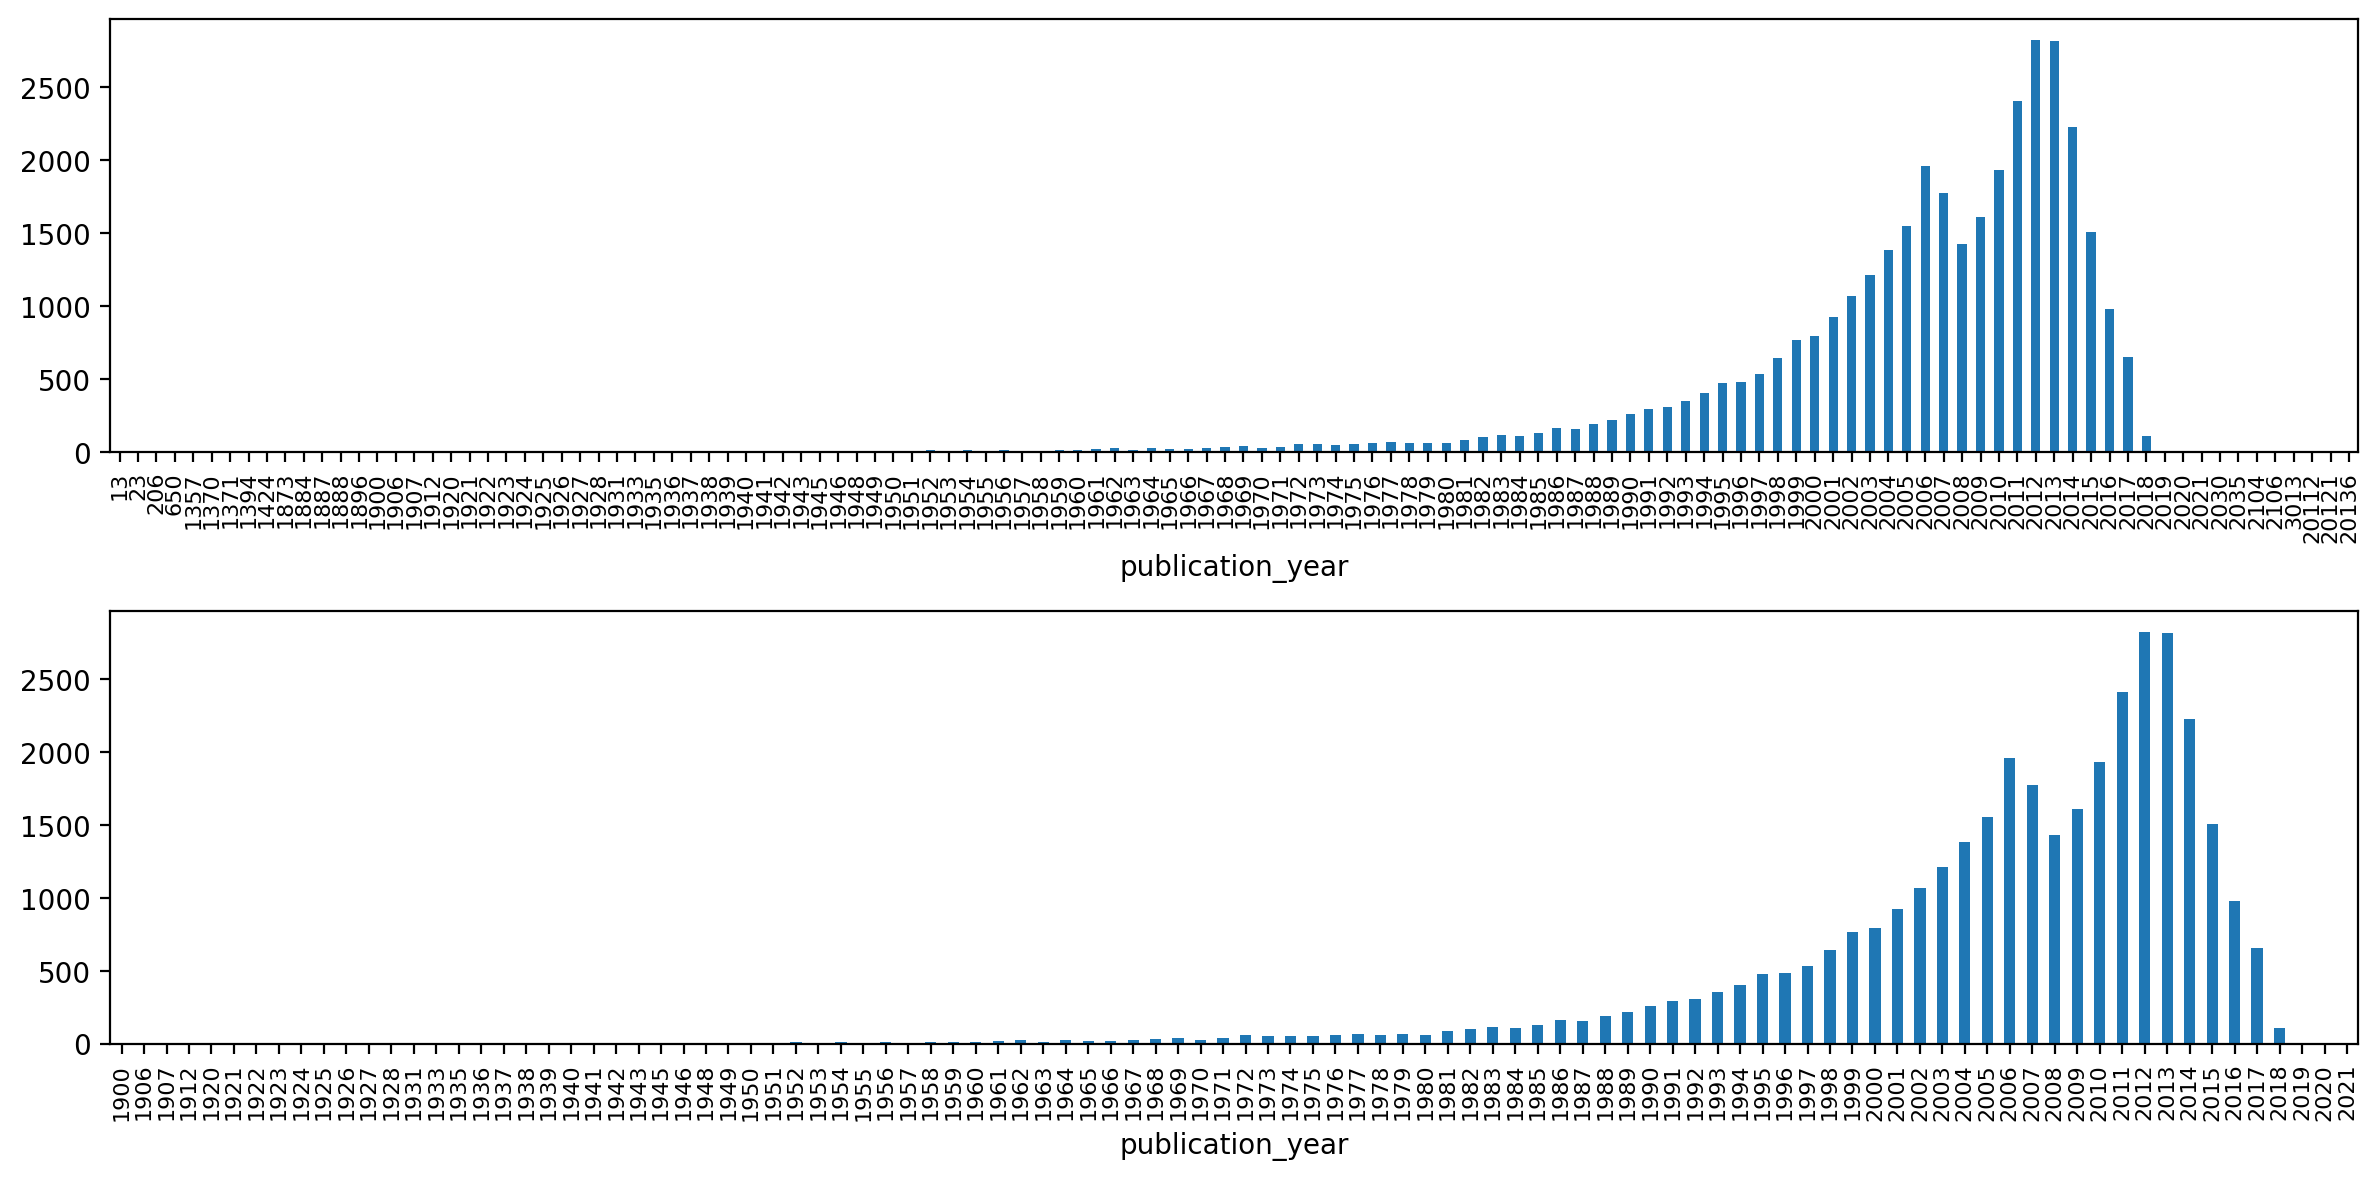

In [10]:
# распределение книг по годам публикации

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
books["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

ax = axs[1]
books.query("publication_year >= 1900 and publication_year <= 2025")["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()

# События по месяцам

In [30]:
from pandas.tseries.offsets import MonthEnd

interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date

In [31]:
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()

In [32]:
interactions_by_month

,started_at_month,events,users
0,2007-01-01,1993,1071
1,2007-02-01,201,135
2,2007-03-01,222,152
3,2007-04-01,201,135
4,2007-05-01,204,138
...,...,...,...
127,2017-08-01,202129,93040
128,2017-09-01,172187,82694
129,2017-10-01,108107,58076
130,2017-11-01,565,475


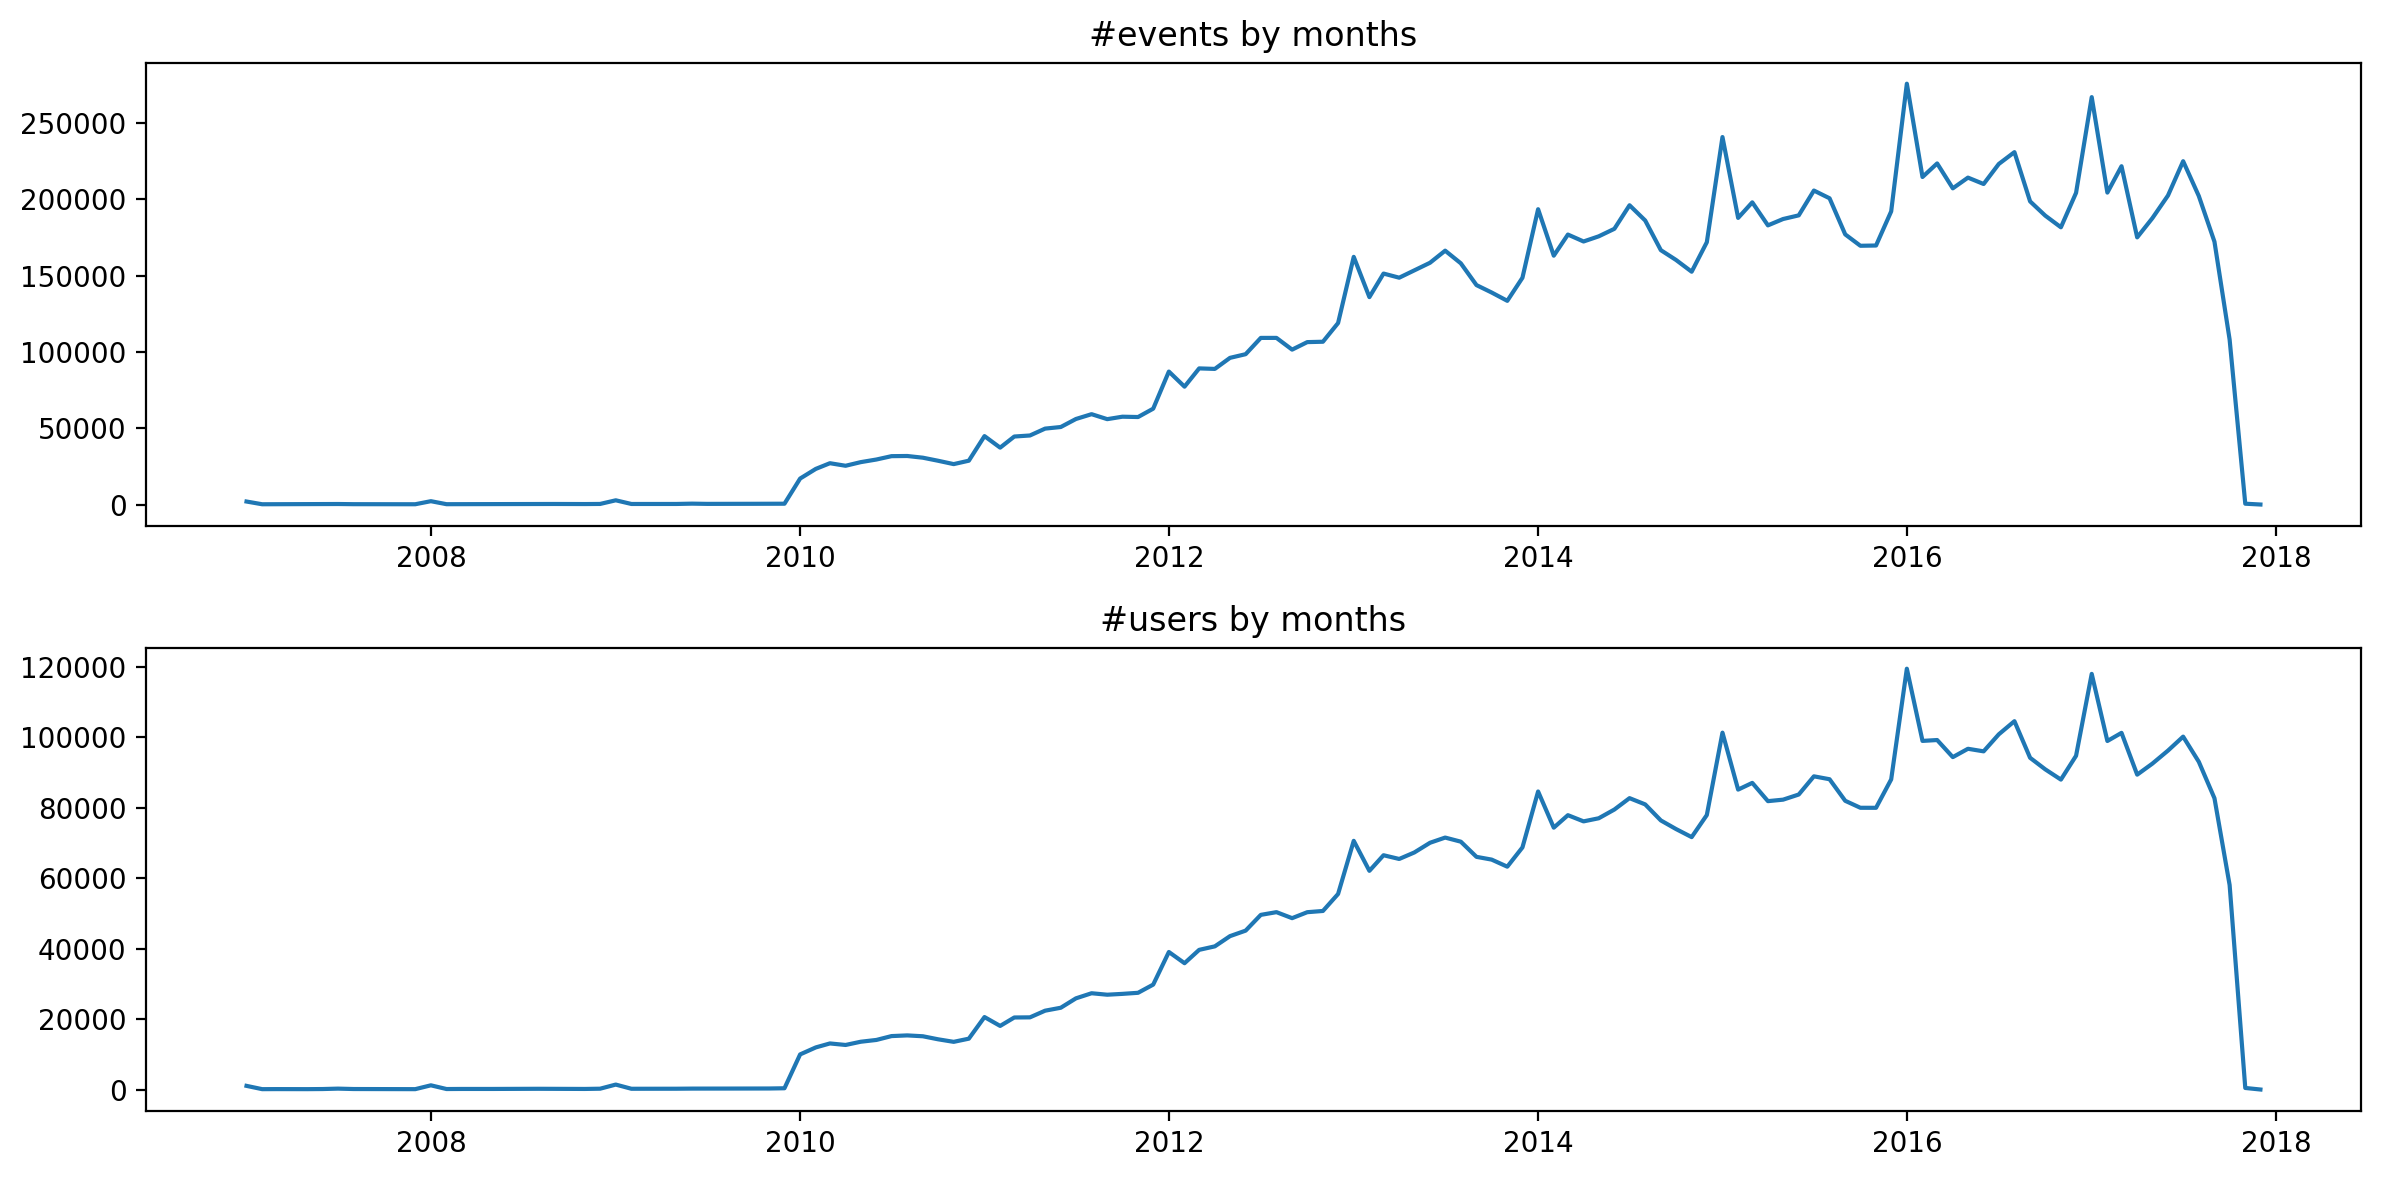

In [33]:
# распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

# Преобработка

Примем новые именования:
- books -> items (более обобщённое название)
- interactions -> events (несколько короче, удобнее в коде)

In [41]:
items = books.copy()
events = interactions.copy()

In [42]:
del books
del interactions

In [43]:
# оставим события только до ноября 2017

event_cutoff_date = pd.to_datetime("2017-11-01").date()
events = events.query("started_at < @event_cutoff_date and read_at < @event_cutoff_date").copy()

# Ваш код здесь

- оставьте события только до 1 ноября 2017 года (не включительно) — событий позднее этой даты не должно быть в данных;
- удалите события, для которых нет рейтинга;
- оставьте события только c признаком is_read=True;
- оставьте только тех пользователей, у которых две прочитанные книги и более.

In [66]:
# количество книг по пользователю
books_by_user = (events.groupby('user_id')['book_id']
                   .nunique()
                   .reset_index(name='unique_books')
                   .query('unique_books >= 2'))['user_id']

events = events.query('is_read == True and rating > 0 and user_id.isin(@books_by_user)')

In [72]:
events = events.rename(columns={'book_id': 'item_id'})
items = items.rename(columns={'book_id': 'item_id'})


In [73]:
# Шаг 1: Создаем маппинг из уникальных user_id в числовые ID (начиная с 1_000_000)
unique_users = events['user_id'].unique()
user_id_mapping = {user_id: idx + 1_000_000 for idx, user_id in enumerate(sorted(unique_users))}

# Шаг 2: Применяем маппинг к столбцу user_id
events['user_id'] = events['user_id'].map(user_id_mapping)

In [80]:
print('Доля оставшихся событий:', events['user_id'].count()/interactions['user_id'].count())

Доля оставшихся событий: 0.9116129061286843


In [82]:
user_id_mapping['8f50136afeb65c55cec7b3d306c24b03']

1241243

# Сохранение результатов

In [83]:
items.to_parquet("items.par")

In [84]:
events.to_parquet("events.par")